In [165]:
import pandas as pd
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [166]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [167]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [168]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [169]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [170]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [172]:
print(x_train.shape)
print(x_train.size)

(614, 8)
4912


In [173]:
print(y_train.shape)
print(y_train.size)

(614,)
614


In [174]:
print(x_test.shape)
print(x_test.size)

(154, 8)
1232


In [175]:
print(y_test.shape)
print(y_test.size)

(154,)
154


In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,
                            random_state=0)
clf=bag_model.fit(x_train,y_train)
clf

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [177]:
ml=DecisionTreeClassifier()
ml.fit(x_train,y_train)

DecisionTreeClassifier()

In [178]:
ml.score(x_test,y_test)

0.7857142857142857

In [179]:
bag_model.score(x_test,y_test)

0.8051948051948052

In [180]:
bag_model.oob_score_

0.750814332247557

In [181]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [182]:
import seaborn as sn
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        99
           1       0.74      0.71      0.72        55

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.79       154
weighted avg       0.80      0.81      0.80       154



In [183]:
metrics.confusion_matrix(y_pred,y_test)

array([[85, 16],
       [14, 39]], dtype=int64)

In [184]:
tn,fp,fn,tp=metrics.confusion_matrix(y_pred,y_test).ravel()
tn,fp,fn,tp

(85, 16, 14, 39)

<AxesSubplot:>

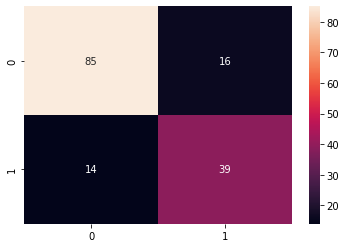

In [185]:
cm=metrics.confusion_matrix(y_pred,y_test)
sn.heatmap(cm,annot=True)

In [186]:
metrics.accuracy_score(y_pred,y_test)

0.8051948051948052

In [187]:
metrics.precision_score(y_pred,y_test)

0.7090909090909091

In [188]:
metrics.recall_score(y_pred,y_test)

0.7358490566037735

In [189]:
metrics.f1_score(y_pred,y_test)

0.7222222222222221

In [190]:
metrics.mean_absolute_error(y_pred,y_test)

0.19480519480519481

In [191]:
metrics.mean_squared_error(y_pred,y_test)

0.19480519480519481

In [192]:
metrics.r2_score(y_pred,y_test)

0.13693256118064656

In [193]:
#root mean square error
import math
import numpy as np
from sklearn import metrics
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
RMSE

0.4413674147523748

In [194]:
#Adjusted R2 score
import numpy as np
from sklearn import metrics
r2_score=metrics.r2_score(y_test,y_pred)
n=y_test.shape[0]
p=3
x=(1-r2_score)
y=(n-1)/(n-p-1)
adj_r2=(1-(x*y))
print('Adjusted_R2:',adj_r2)

Adjusted_R2: 0.1345454545454543


In [195]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 50, 100],'max_samples': [0.5, 0.7, 1.0],'max_features': [0.5, 0.7, 1.0]}
bag_hpt1=GridSearchCV(clf,param_grid,cv=5)
bag_hpt1.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_samples=0.8, n_estimators=100,
                                         oob_score=True, random_state=0),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]})

In [196]:
bag_hpt1.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=50, oob_score=True, random_state=0)

In [197]:
bag_hpt1.best_index_

19

In [198]:
bag_hpt1.best_params_

{'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}

In [199]:
bag_hpt1.best_score_

0.7801412768226043

In [200]:
bag_hpt1.cv

5

In [201]:
bag_hpt1.cv_results_

{'mean_fit_time': array([0.01637745, 0.06302376, 0.12368655, 0.01483517, 0.06556125,
        0.13468013, 0.01560068, 0.07004719, 0.14308662, 0.01381931,
        0.0653398 , 0.1266757 , 0.01500034, 0.06749625, 0.13538671,
        0.01593394, 0.08342285, 0.14914751, 0.02073288, 0.07455735,
        0.13621478, 0.02084866, 0.07822194, 0.1566287 , 0.01795654,
        0.08301744, 0.18195806]),
 'std_fit_time': array([1.57101262e-03, 1.91919683e-03, 4.92328687e-03, 8.95425651e-04,
        1.03098186e-03, 4.89715165e-03, 4.89789920e-04, 1.52036440e-03,
        6.29441066e-03, 4.09336542e-04, 2.87847969e-03, 3.32964236e-03,
        1.01152436e-06, 6.88525867e-04, 5.05356191e-03, 1.31424695e-04,
        1.34125695e-02, 4.72333938e-03, 6.62552080e-03, 9.94163605e-03,
        3.67155661e-03, 6.19384486e-03, 4.06968929e-03, 1.72237741e-02,
        1.02447373e-04, 5.36328825e-04, 2.02329303e-02]),
 'mean_score_time': array([0.0046936 , 0.00371003, 0.00690188, 0.00180979, 0.00400162,
        0.007229

In [202]:
data=pd.DataFrame(bag_hpt1.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016377,0.001571,0.004694,0.005197,0.5,0.5,10,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.739837,0.715447,0.707317,0.747967,0.737705,0.729655,0.015522,27
1,0.063024,0.001919,0.003710,0.000401,0.5,0.5,50,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.731707,0.764228,0.739837,0.780488,0.778689,0.758990,0.019944,10
2,0.123687,0.004923,0.006902,0.000196,0.5,0.5,100,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.772358,0.723577,0.764228,0.756098,0.770492,0.757350,0.017818,12
3,0.014835,0.000895,0.001810,0.000400,0.5,0.7,10,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.723577,0.780488,0.747967,0.715447,0.737705,0.741037,0.022694,23
4,0.065561,0.001031,0.004002,0.000003,0.5,0.7,50,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.747967,0.747967,0.772358,0.756098,0.737705,0.752419,0.011552,16
5,0.134680,0.004897,0.007229,0.000975,0.5,0.7,100,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.764228,0.764228,0.772358,0.747967,0.754098,0.760576,0.008561,8
6,0.015601,0.000490,0.001400,0.000490,0.5,1.0,10,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...",0.747967,0.723577,0.780488,0.747967,0.762295,0.752459,0.018745,15
7,0.070047,0.001520,0.003593,0.000483,0.5,1.0,50,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...",0.756098,0.764228,0.780488,0.747967,0.737705,0.757297,0.014548,13
8,0.143087,0.006294,0.007516,0.000999,0.5,1.0,100,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...",0.756098,0.764228,0.796748,0.756098,0.737705,0.762175,0.019350,7
9,0.013819,0.000409,0.001600,0.000493,0.7,0.5,10,"{'max_features': 0.7, 'max_samples': 0.5, 'n_e...",0.723577,0.756098,0.772358,0.739837,0.729508,0.744276,0.017858,20


In [203]:
data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016377,0.001571,0.004694,0.005197,0.5,0.5,10,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.739837,0.715447,0.707317,0.747967,0.737705,0.729655,0.015522,27
1,0.063024,0.001919,0.003710,0.000401,0.5,0.5,50,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.731707,0.764228,0.739837,0.780488,0.778689,0.758990,0.019944,10
2,0.123687,0.004923,0.006902,0.000196,0.5,0.5,100,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.772358,0.723577,0.764228,0.756098,0.770492,0.757350,0.017818,12
3,0.014835,0.000895,0.001810,0.000400,0.5,0.7,10,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.723577,0.780488,0.747967,0.715447,0.737705,0.741037,0.022694,23
4,0.065561,0.001031,0.004002,0.000003,0.5,0.7,50,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.747967,0.747967,0.772358,0.756098,0.737705,0.752419,0.011552,16


In [204]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
cvs

array([0.77419355, 0.77419355, 0.74193548, 0.75806452, 0.75409836,
       0.73770492, 0.75409836, 0.75409836, 0.7704918 , 0.70491803])

In [205]:
cvs.mean()

0.7523796932839768

In [206]:
cvs.std()*2

0.039486481214923125

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
bag_model=BaggingRegressor(base_estimator=DecisionTreeClassifier(),n_estimators=10,random_state=12)
ml=bag_model.fit(x_train,y_train)
ml

BaggingRegressor(base_estimator=DecisionTreeClassifier(), random_state=12)

In [208]:
ml.score(x_test,y_test)

0.3076363636363634

In [209]:
y_pred=ml.predict(x_test)
y_pred

array([0.3, 0.9, 0.8, 0.2, 0.3, 0.2, 0.3, 0.7, 0.2, 0.5, 0.1, 0.7, 0.2,
       0.3, 0.2, 0. , 0.2, 0.3, 0.6, 0.1, 0. , 0.8, 0.4, 0.1, 0.6, 0.8,
       0.7, 0.7, 0.9, 0. , 0.9, 0.7, 0.1, 0.5, 0.1, 0.2, 0.3, 1. , 0.1,
       0.1, 0. , 0.2, 0.5, 0.9, 0.7, 0.1, 0.9, 0.7, 0.3, 0. , 0.4, 0.1,
       0.4, 0.7, 0.7, 0. , 0.2, 0.6, 0.2, 0. , 0.1, 0.3, 0.2, 0.3, 0.3,
       0. , 0.6, 0.2, 0.5, 0. , 0. , 0.9, 0.9, 0. , 0.4, 0.7, 0.5, 0. ,
       0. , 0.5, 0.1, 0.1, 0.9, 0.3, 0.7, 0.1, 0.6, 0.1, 0.6, 0.3, 0.3,
       0. , 0. , 0.1, 0.7, 1. , 0.8, 0.1, 0.1, 0. , 0. , 0.2, 0.2, 0.7,
       0.6, 0.1, 0.9, 0.2, 0.7, 0.3, 0.5, 0.4, 0. , 0. , 0.3, 0.1, 0. ,
       0.1, 0.1, 0.7, 0.8, 0.2, 0.4, 0.1, 0.1, 0. , 0.4, 0. , 0. , 0.1,
       0.8, 0.7, 0.8, 0.3, 0.2, 0.1, 0.1, 0.3, 0.2, 0.5, 0.4, 0.4, 0. ,
       0.2, 0.7, 0.2, 0.1, 0.6, 0.3, 0.8, 0.4, 0.8, 0.8, 0.3])

In [210]:
from sklearn import metrics
from math import sqrt
metrics.mean_squared_error(y_pred,y_test)

0.15896103896103897

In [211]:
metrics.r2_score(y_pred,y_test)

-0.8141361256544504

In [212]:
metrics.mean_absolute_error(y_pred,y_test)

0.30129870129870134

In [213]:
#root mean square error
import math
import numpy as np
from sklearn import metrics
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
RMSE

0.3986991835469932

In [214]:
#Adjusted R2 score
import numpy as np
from sklearn import metrics
r2_score=metrics.r2_score(y_test,y_pred)
n=y_test.shape[0]
p=3
x=(1-r2_score)
y=(n-1)/(n-p-1)
adj_r2=(1-(x*y))
print('Adjusted_R2:',adj_r2)

Adjusted_R2: 0.29378909090909067


In [216]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(ml,x_train,y_train,cv=10,scoring='r2')
cvs

array([0.07      , 0.35375661, 0.31737374, 0.11790909, 0.16836667,
       0.08336898, 0.19286585, 0.08578811, 0.16526316, 0.17154462])

In [217]:
cvs.mean()

0.17262368403373213

In [218]:
cvs.std()*2

0.18251252067312462

In [220]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 50, 100],'max_samples': [0.5, 0.7, 1.0],'max_features': [0.5, 0.7, 1.0]}
bag_hpt2=GridSearchCV(ml,param_grid,cv=5)
bag_hpt2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeClassifier(),
                                        random_state=12),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]})

In [221]:
bag_hpt2.best_estimator_

BaggingRegressor(base_estimator=DecisionTreeClassifier(), max_samples=0.7,
                 n_estimators=100, random_state=12)

In [222]:
bag_hpt2.best_index_

23

In [223]:
bag_hpt2.best_params_

{'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 100}

In [224]:
bag_hpt2.best_score_

0.26833005942651145

In [225]:
bag_hpt2.cv

5

In [226]:
bag_hpt2.cv_results_

{'mean_fit_time': array([0.01386189, 0.05117583, 0.09832354, 0.01163197, 0.05621452,
        0.10624733, 0.01295443, 0.05823483, 0.11551151, 0.01116128,
        0.05170588, 0.1023674 , 0.012429  , 0.05665345, 0.11319723,
        0.01334047, 0.06171432, 0.12265506, 0.01270299, 0.05814886,
        0.11455989, 0.01376033, 0.07048407, 0.12878785, 0.01595535,
        0.11136751, 0.15320067]),
 'std_fit_time': array([0.00220856, 0.00262143, 0.00054598, 0.00051547, 0.00348955,
        0.00103966, 0.00050534, 0.00089214, 0.00085622, 0.00044808,
        0.00036509, 0.0005089 , 0.00049634, 0.00104571, 0.00144973,
        0.00050756, 0.00064207, 0.00116272, 0.0003993 , 0.00078623,
        0.00118005, 0.00033693, 0.0049796 , 0.0010232 , 0.00064316,
        0.02847261, 0.00782563]),
 'mean_score_time': array([0.00240207, 0.00358214, 0.0055512 , 0.00119834, 0.00358682,
        0.00573878, 0.00160251, 0.00343218, 0.00559921, 0.00139818,
        0.00379972, 0.00571723, 0.00160098, 0.00321255, 0.005899

In [228]:
data2=pd.DataFrame(bag_hpt2.cv_results_)
data2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013862,0.002209,0.002402,0.000798,0.5,0.5,10,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.192394,0.251627,0.158307,0.225824,0.151810,0.195992,0.038394,22
1,0.051176,0.002621,0.003582,0.000482,0.5,0.5,50,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.267306,0.275145,0.243257,0.267636,0.191256,0.248920,0.030768,14
2,0.098324,0.000546,0.005551,0.000763,0.5,0.5,100,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.263916,0.265360,0.283979,0.264113,0.193598,0.254193,0.031230,12
3,0.011632,0.000515,0.001198,0.000402,0.5,0.7,10,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.178325,0.205316,0.137698,0.248672,0.142369,0.182476,0.041314,26
4,0.056215,0.003490,0.003587,0.000481,0.5,0.7,50,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.243215,0.275574,0.216777,0.257674,0.152216,0.229091,0.042985,18
5,0.106247,0.001040,0.005739,0.000743,0.5,0.7,100,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.239869,0.260036,0.245434,0.260781,0.169848,0.235194,0.033671,17
6,0.012954,0.000505,0.001603,0.000491,0.5,1.0,10,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...",0.225891,0.206428,0.164092,0.189647,0.176863,0.192584,0.021765,24
7,0.058235,0.000892,0.003432,0.000493,0.5,1.0,50,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...",0.281629,0.253835,0.247162,0.264026,0.155048,0.240340,0.044202,16
8,0.115512,0.000856,0.005599,0.000489,0.5,1.0,100,"{'max_features': 0.5, 'max_samples': 1.0, 'n_e...",0.270418,0.252642,0.256367,0.259570,0.172397,0.242279,0.035440,15
9,0.011161,0.000448,0.001398,0.000491,0.7,0.5,10,"{'max_features': 0.7, 'max_samples': 0.5, 'n_e...",0.228235,0.179753,0.152522,0.270759,0.176863,0.201626,0.042403,21


In [229]:
data2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013862,0.002209,0.002402,0.000798,0.5,0.5,10,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.192394,0.251627,0.158307,0.225824,0.151810,0.195992,0.038394,22
1,0.051176,0.002621,0.003582,0.000482,0.5,0.5,50,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.267306,0.275145,0.243257,0.267636,0.191256,0.248920,0.030768,14
2,0.098324,0.000546,0.005551,0.000763,0.5,0.5,100,"{'max_features': 0.5, 'max_samples': 0.5, 'n_e...",0.263916,0.265360,0.283979,0.264113,0.193598,0.254193,0.031230,12
3,0.011632,0.000515,0.001198,0.000402,0.5,0.7,10,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.178325,0.205316,0.137698,0.248672,0.142369,0.182476,0.041314,26
4,0.056215,0.003490,0.003587,0.000481,0.5,0.7,50,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.243215,0.275574,0.216777,0.257674,0.152216,0.229091,0.042985,18
